In [27]:
import pandas as pd
import numpy as np
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

df = pd.read_csv('AirPassengers.csv')

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [5]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


Text(0, 0.5, 'Number of passengers')

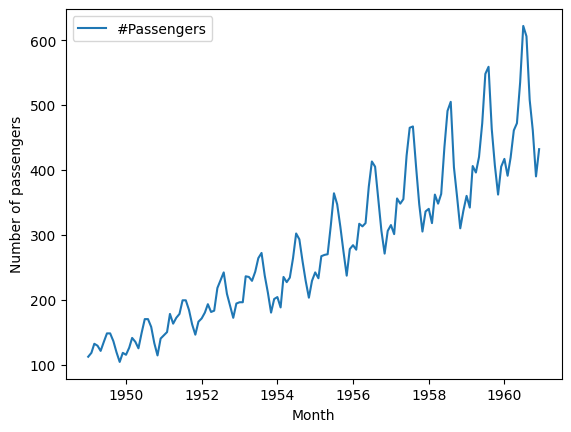

In [6]:
sns.lineplot(df)
plt.ylabel('Number of passengers')

In [7]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()


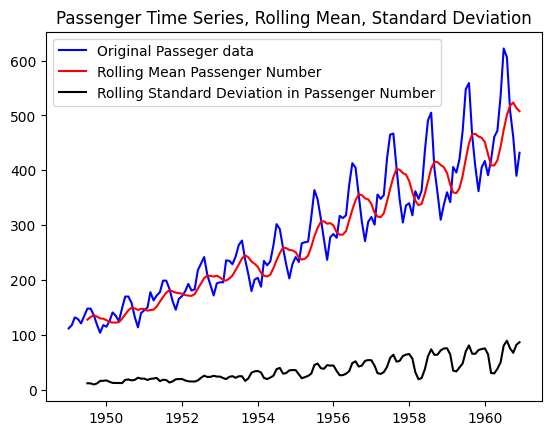

In [8]:
plt.plot(df, color='blue', label='Original Passeger data')
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color='black', label='Rolling Standard Deviation in Passenger Number')
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [9]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


In [10]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag1: ", autocorrelation_lag1)

autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag3: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag6: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag9: ", autocorrelation_lag9)



One Month Lag1:  0.9601946480498522
Three Month Lag3:  0.837394765081794
Six Month Lag6:  0.7839187959206183
Nine Month Lag9:  0.8278519011167602


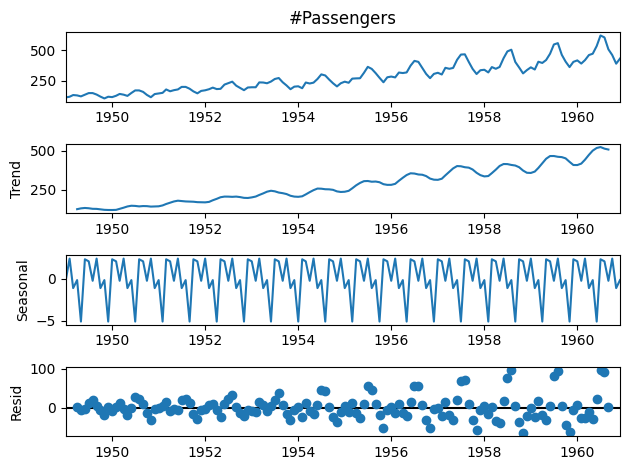

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

C:\Users\playn\AppData\Local\Temp\ipykernel_11844\2549470539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
C:\Users\playn\AppData\Local\Temp\ipykernel_11844\2549470539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


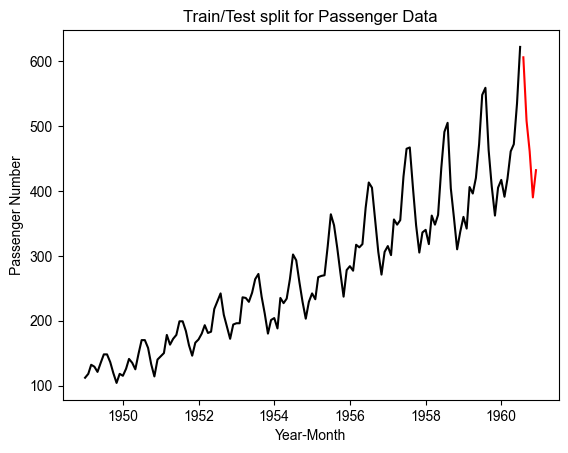

In [12]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [13]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

<function matplotlib.pyplot.show(close=None, block=None)>

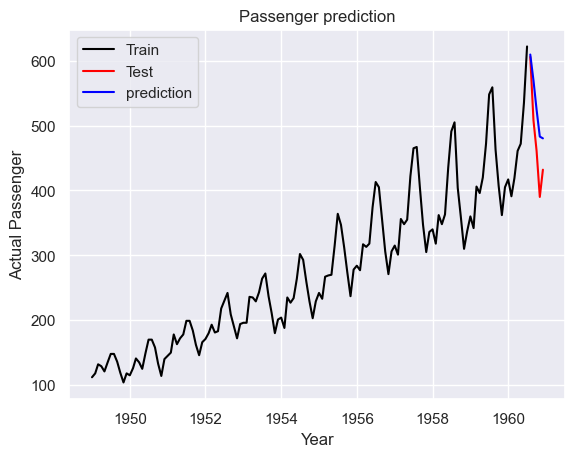

In [14]:
plt.plot(train, color = "black", label="Train")
plt.plot(test, color = "red", label="Test")
plt.plot(forecast, color = 'blue', label='prediction')
plt.title('Passenger prediction')
plt.ylabel('Actual Passenger')
plt.xlabel('Year')
plt.legend(labels=['Train', 'Test', 'prediction'])
plt.show